# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии.

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр.

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии.

 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

## Import библиотек

In [ ]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Загрузка данных на Google Drive

In [ ]:
uploaded = files.upload()

## Считываем файл в DataFrame



метод .read_csv(path,delimiter)

In [ ]:
df = pd.read_csv('/content/cars_moldova_cat_num.csv', delimiter = ',')
df

In [ ]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

# Метод главных компонент


In [ ]:
from sklearn.decomposition import PCA

Рассмотри многомерный вариант

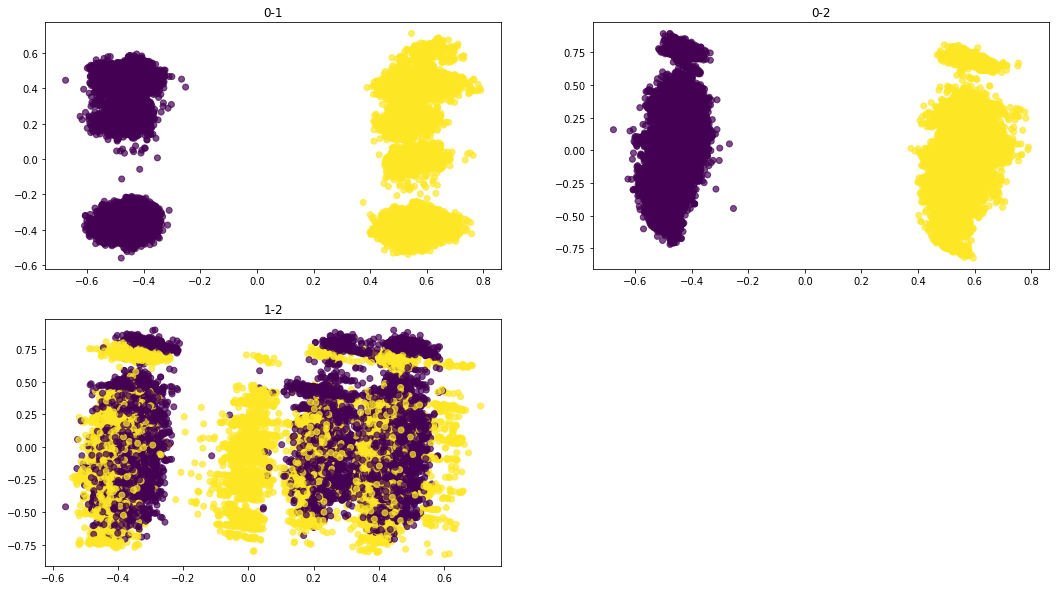

In [ ]:
scaler    = MinMaxScaler()
X = scaler.fit_transform(df)
pca = PCA()
labels = df.Transmission

X_new = pca.fit_transform(X)
X_new.shape

plt.figure(figsize=(18,10))
plt.subplot(221); plt.scatter(X_new[:,0],X_new[:,1], c =labels, alpha = 0.7); plt.title("0-1")
plt.subplot(222); plt.scatter(X_new[:,0],X_new[:,2], c =labels, alpha = 0.7); plt.title("0-2")
plt.subplot(223); plt.scatter(X_new[:,1],X_new[:,2], c =labels, alpha = 0.7); plt.title("1-2")
plt.show();

Визуализация "весов" главных компонент

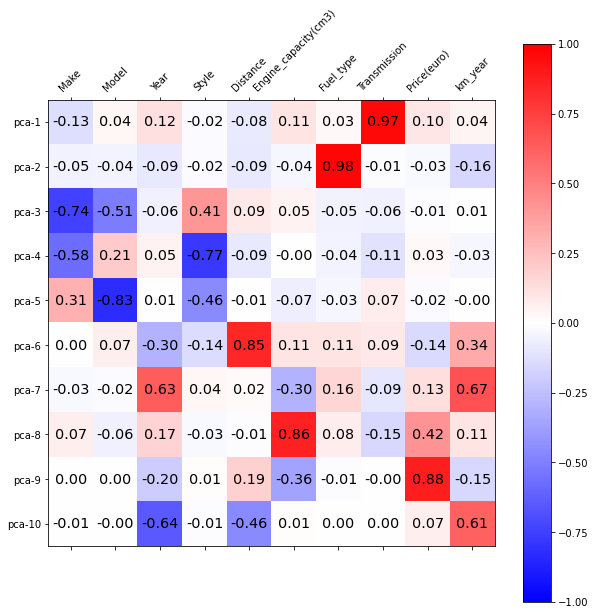

In [ ]:
fig=plt.figure(figsize=(10,10))
W = pca.components_
pca_names = ['pca-'+str(x+1) for x in range(W.shape[0])]
plt.matshow(W.astype(float),cmap='bwr',vmin=-1,vmax=1, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'x-large')
plt.xticks(np.arange(0, W.shape[1]), df.columns,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),pca_names)
plt.colorbar();

In [ ]:
EV=pca.explained_variance_ratio_
print('Объясненная дисперсия на Главную Компоненту: {}'.format(EV))

Объясненная дисперсия на Главную Компоненту: [0.34829257 0.19331025 0.15553331 0.11710685 0.07689344 0.05063804
 0.03300243 0.01661601 0.00496259 0.00364452]


Построение графика объясненной дисперсии

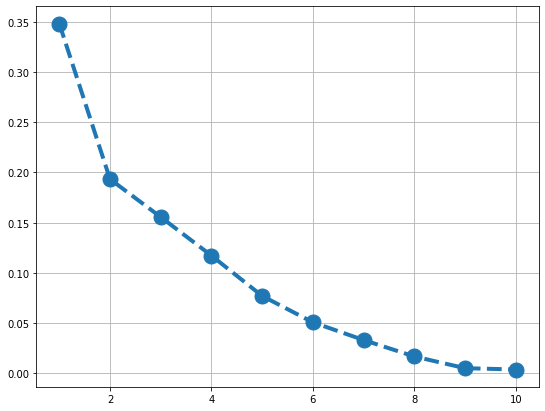

In [ ]:
fig = plt.figure( figsize=(9,7) )
plt.plot(np.array(range(len(EV)))+1,EV,'o--',linewidth=4, markersize=15)
plt.grid()

Построение графика кумулятивной объясненной дисперсии

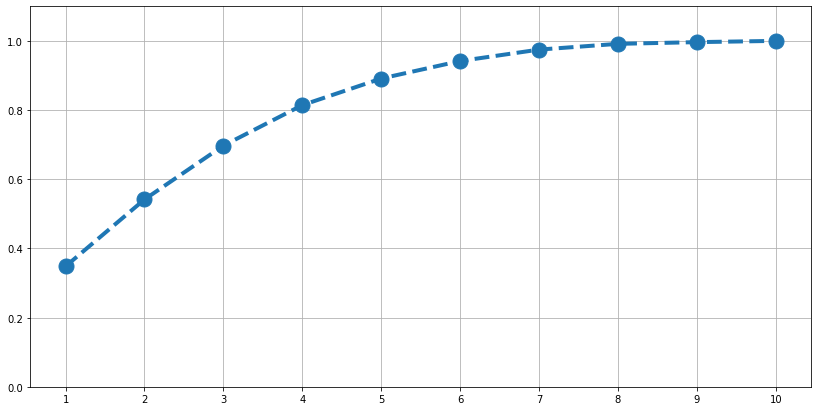

In [ ]:
fig = plt.figure( figsize=(14,7))
plt.plot(np.array(range(len(EV)))+1,np.cumsum(EV),'o--',linewidth=4, markersize=15)
plt.grid()
plt.xticks(np.array(range(len(EV)))+1)
plt.ylim(0,1.1);

Визуализация различных Главных компонент

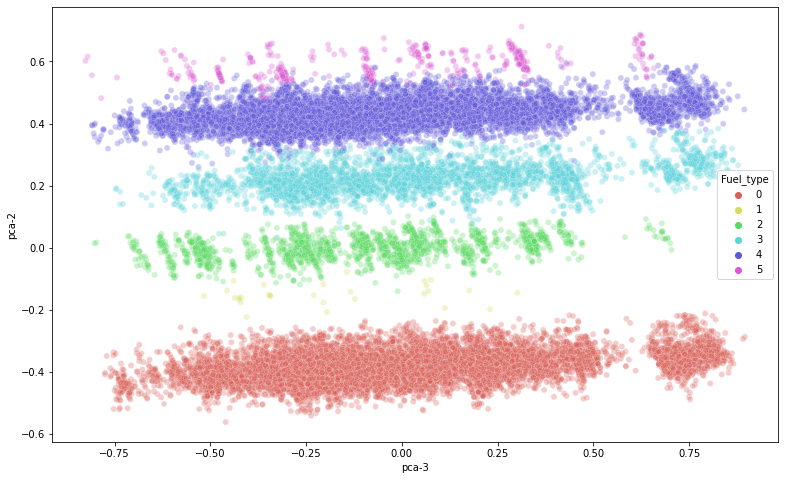

In [ ]:
#@title Построение двух разных Главных Компонент { run: "auto" }
pca_x =  3 #@param {type:"slider", min:1, max:10, step:1}
pca_y = 2 #@param {type:"slider", min:1, max:10, step:1}
y = 'Fuel_type'  #@param [  'Style', 'Fuel_type', 'Transmission'] {type:"string"}

DF = df.copy()
DF[pca_names] = X_new

plt.figure(figsize=(13,8))
sns.scatterplot(
    x='pca-'+str(pca_x), y='pca-'+str(pca_y),
    hue=y,
    palette=sns.color_palette("hls", DF[y].nunique()),
    data=DF,
    legend="full",
    alpha=0.3,);

# Сингулярное Разложение Матриц

In [ ]:
scaler    = MinMaxScaler()
X = scaler.fit_transform(df)

U, s, VT = np.linalg.svd(X,full_matrices=False)

In [ ]:
X.shape

(32074, 10)

In [ ]:
U.shape, s.shape, VT.shape

((32074, 10), (10,), (10, 10))

In [ ]:
S = np.diag(s)
S.shape

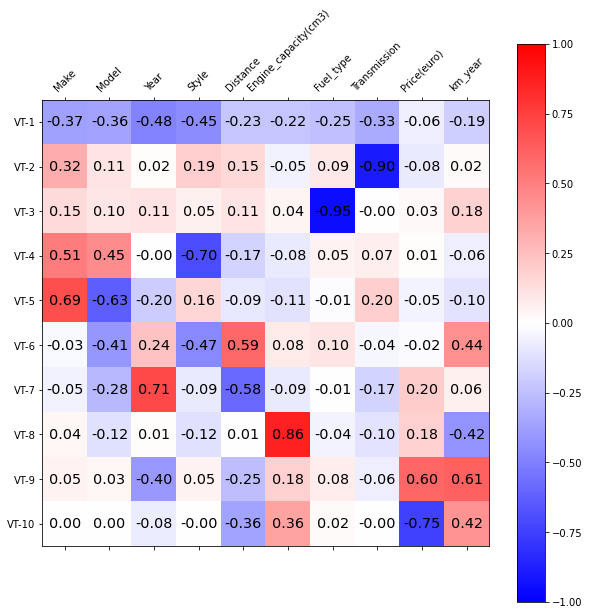

In [ ]:
fig=plt.figure(figsize=(10,10))
W =  VT
svd_names = ['VT-'+str(x+1) for x in range(W.shape[0])]
plt.matshow(W.astype(float),cmap='bwr',vmin=-1,vmax=1, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'x-large')
plt.xticks(np.arange(0, W.shape[1]), df.columns,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),svd_names)
plt.colorbar();

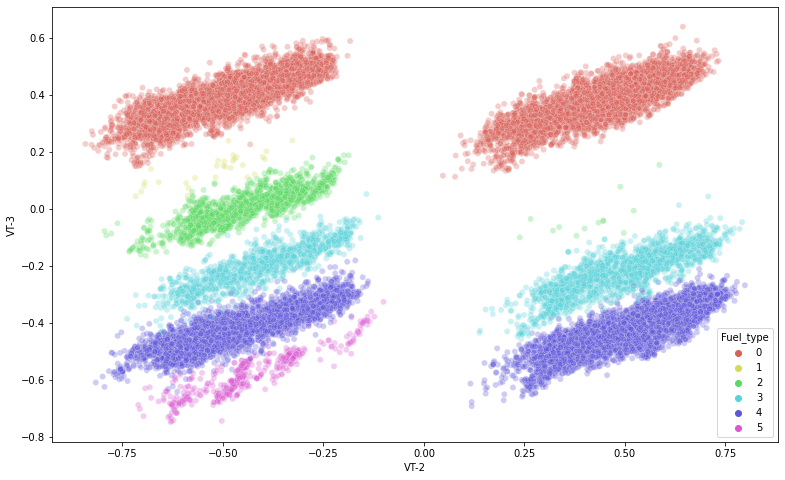

In [ ]:
#@title Построение двух разных Проекций { run: "auto" }
svd_x =  2 #@param {type:"slider", min:1, max:10, step:1}
svd_y = 3 #@param {type:"slider", min:1, max:10, step:1}
y = 'Fuel_type'  #@param [  'Style', 'Fuel_type', 'Transmission'] {type:"string"}

DF_svd = df.copy()

Y=U.dot(S[:, :])

DF_svd[svd_names] = Y


plt.figure(figsize=(13,8))
sns.scatterplot(
    x='VT-'+str(svd_x), y='VT-'+str(svd_y),
    hue=y,
    palette=sns.color_palette("hls", DF_svd[y].nunique()),
    data=DF_svd,
    legend="full",
    alpha=0.3,);

# Кластеризация k-средних

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

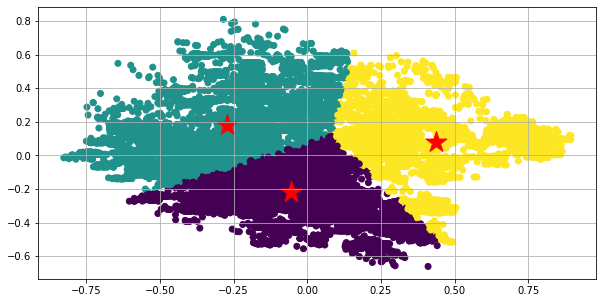

In [ ]:
#@title Выбор двух разных Главных Компонент { run: "auto" }
pca_x =  3 #@param {type:"slider", min:1, max:10, step:1}
pca_y = 5 #@param {type:"slider", min:1, max:10, step:1}
#@markdown ### Число Кластеров
k = 3 #@param {type:"slider", min:2, max:10, step:1}

X_cluster = DF.loc[:,['pca-'+str(pca_x), 'pca-'+str(pca_y)]].values

km = KMeans(n_clusters=k)
km.fit(X_cluster)
centroids = km.cluster_centers_
labels = km.fit_predict(X_cluster)
label_centroids = km.fit_predict(centroids)

plt.figure(figsize=(10, 5))
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=490)
plt.grid();

Метрики

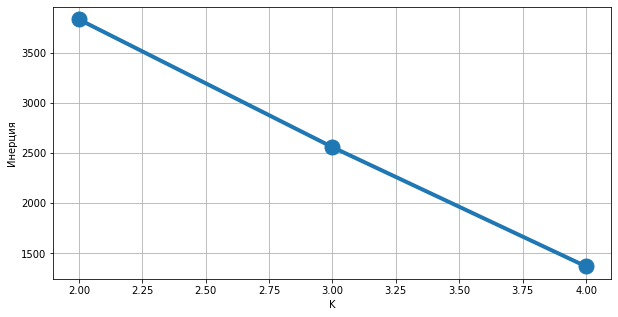

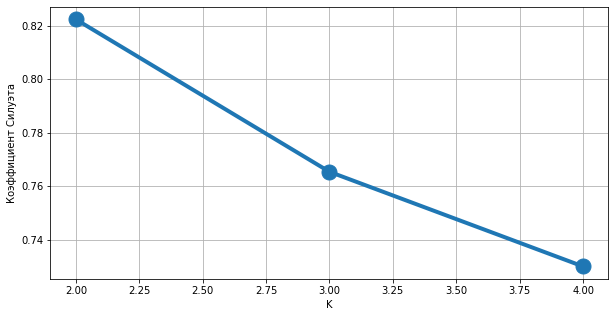

In [ ]:
sse = []
sil_scor = []
list_k = list(range(2, 10))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_cluster)
    sse.append(km.inertia_)
    labels = km.fit_predict(X_cluster)
    sil_scor.append(metrics.silhouette_score(X_cluster, labels, metric='sqeuclidean'))

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',linewidth=4, markersize=15)
plt.grid()
plt.xlabel('K')
plt.ylabel('Инерция');
plt.figure(figsize=(10, 5))
plt.plot(list_k, sil_scor, '-o',linewidth=4, markersize=15)
plt.grid()
plt.xlabel('K')
plt.ylabel('Коэффициент Силуэта');

# Линейная Регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

**Считываем данные, разбиваем на тестовую и тренировочную, нормализуем**

In [ ]:
df_num = df[num_columns].copy()

X,y = df_num.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

**Применение Линейной Регрессии**

In [ ]:
LR = LinearRegression(fit_intercept=True)

LR.fit(X_train, y_train)

B0=LR.intercept_
B=LR.coef_

line='{:.2f}'.format(B0)
sign=['+','-']

features_names = df_num.drop(columns = ['Price(euro)']).columns
for p,(fn,b) in enumerate(zip(features_names,B)):
  line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

print('Решение')
print(line)
print('\n')

Решение
-17558.72+25929.79*Year-13919.14*Distance+29933.60*Engine_capacity(cm3)+7625.58*km_year




**Визуализация Весов**

In [ ]:
def weights_vis(B, B0, features_names):
    numbers = np.arange(0,len(features_names)+1)
    Bs = np.hstack([B0,B])
    tick_labels = ['B'+str(num) for num in numbers]
    cc=['']*len(numbers)
    for n,val in enumerate(Bs):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = Bs, color = cc)
    plt.xticks(np.arange(0,len(features_names)+1),np.hstack(['b0', features_names]),rotation = 45 );

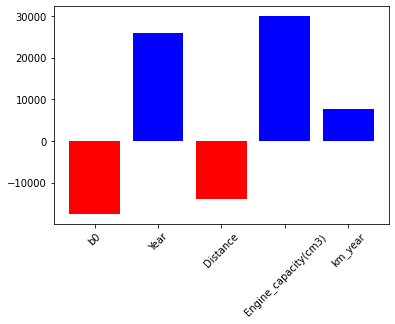

In [ ]:
weights_vis(B, B0, features_names)

**Кросс-валидация**

In [ ]:
scoring = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}


scores = cross_validate(LR, X_train, y_train,
                      scoring=scoring, cv=ShuffleSplit(n_splits=5, random_state=42) )

print('Результаты Кросс-валидации')
DF_cv_linreg = pd.DataFrame(scores)
display(DF_cv_linreg)
print('\n')
print(DF_cv_linreg.mean()[2:])
print('\n')

Результаты Кросс-валидации


fit_time  score_time   test_R2     test_-MSE    test_-MAE      test_Max
0  0.009660    0.001781  0.483314 -4.384359e+07 -4042.039130 -66010.052818
1  0.004369    0.001159  0.517201 -4.925032e+07 -4126.554701 -65864.391055
2  0.003971    0.001134  0.477549 -4.576872e+07 -4020.465350 -99822.503810
3  0.004746    0.002733  0.492705 -4.862460e+07 -4141.622815 -87265.950282
4  0.004103    0.001317  0.524420 -4.335583e+07 -4142.380426 -54193.260736



test_R2      4.990376e-01
test_-MSE   -4.616861e+07
test_-MAE   -4.094612e+03
test_Max    -7.463123e+04
dtype: float64




**Применение Метрик**

In [ ]:
LR.fit(X_train, y_train)
y_predict=LR.predict(X_test)

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))
print('R2 : %.4f' %  r2_score(y_test,y_predict))

Ошибка на тестовых данных
MSE: 48782350.3
RMSE: 6984.4
R2 : 0.5009


Разброс значений

In [ ]:
y.max()-y.min()

99800.0

**Визуализация Тестовых и Предсказанных значений**

In [ ]:
def print_stem(y, label, marker):
    markerline, stemlines, baseline = plt.stem(y, markerfmt=marker,label = label,use_line_collection = True, )
    markerline.set_markerfacecolor('none')

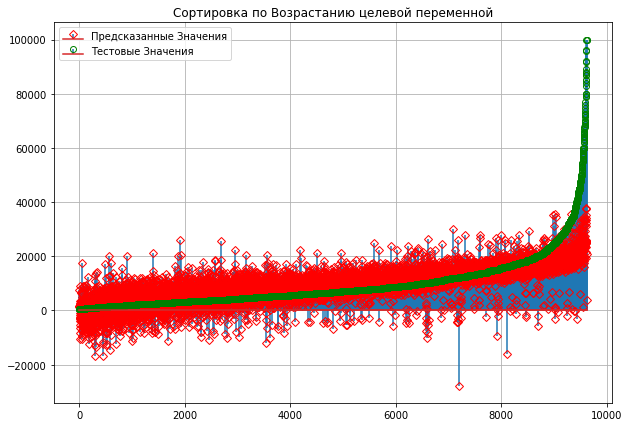

In [ ]:
fig=plt.figure(figsize=(10, 7))
sorted = np.argsort(y_test)
print_stem(y_predict[sorted], 'Предсказанные Значения', 'rD')
print_stem(y_test[sorted], 'Тестовые Значения', 'go')

plt.grid()
plt.title('Сортировка по Возрастанию целевой переменной')
plt.legend();

# Регуляризация Линейной Регрессии

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

**Lasso**

Решение
-10749.22+22620.75*Year-4141.34*Distance+13771.72*Engine_capacity(cm3)


Ошибка на тестовых данных
MSE: 59192937.3
RMSE: 7693.7
R2 : 0.3944


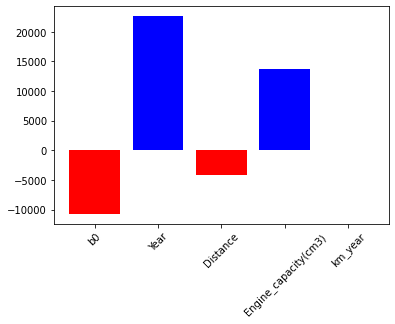

In [ ]:
#@title Регуларизация Lasso { run: "auto" }
#@markdown ### Константа Регуларизации
alpha=241.01 #@param {type:"slider", min:0.01, max:250, step:1}

model = Lasso(alpha=alpha,max_iter=10000 )

model.fit(X_train, y_train)

B0=model.intercept_
B=model.coef_

line='{:.2f}'.format(B0)
sign=['+','-']

features_names = df_num.drop(columns = ['Price(euro)']).columns
for p,(fn,b) in enumerate(zip(features_names,B)):
  if np.abs(b)>0:
    line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

print('Решение')
print(line)
print('\n')

y_predict=model.predict(X_test)

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))
print('R2 : %.4f' %  r2_score(y_test,y_predict))

weights_vis(B, B0, features_names)

**Ridge**

Решение
-7604.15+17765.27*Year-11689.68*Distance+17454.79*Engine_capacity(cm3)+6498.51*km_year


Ошибка на тестовых данных
MSE: 55396557.0
RMSE: 7442.9
R2 : 0.4332


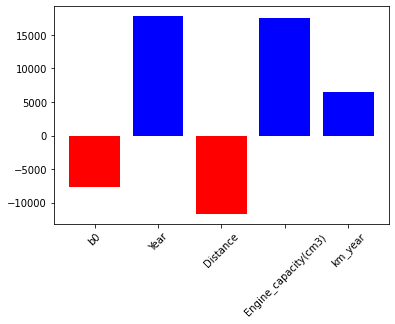

In [ ]:
#@title Регуларизация Ridge { run: "auto" }
#@markdown ### Константа Регуларизации
alpha=249.01 #@param {type:"slider", min:0.01, max:250, step:1}

model = Ridge(alpha=alpha,max_iter=10000 )

model.fit(X_train, y_train)

B0=model.intercept_
B=model.coef_

line='{:.2f}'.format(B0)
sign=['+','-']

features_names = df_num.drop(columns = ['Price(euro)']).columns
for p,(fn,b) in enumerate(zip(features_names,B)):
  if np.abs(b)>0:
    line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

print('Решение')
print(line)
print('\n')

y_predict=model.predict(X_test)

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))
print('R2 : %.4f' %  r2_score(y_test,y_predict))

weights_vis(B, B0, features_names)

# Логистическая Регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1

In [ ]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
X = df[num_columns].values
y = df["Transmission"].values
features_names = df[num_columns].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

Решение
-8.13+5.17*Year+1.21*Distance+7.94*Engine_capacity(cm3)+20.87*Price(euro)-2.43*km_year


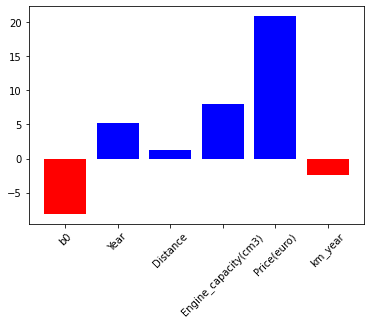

In [ ]:
#@title Логистическая Регрессия{ run: "auto" }
#@markdown ### Тип Регуляризации
penalty= 'l1' #@param [ "l2" , "l1", "none"]{type:"string"}
#@markdown ### Константа Регуларизации
regularization = 1.66 #@param {type:"slider", min:0.01, max:3, step:0.05}



LogReg = LogisticRegression(fit_intercept=True,
                            penalty=penalty,solver='saga',
                            C=regularization,
                            max_iter=100000)

LogReg.fit(X_train, y_train)

B0=LogReg.intercept_[0]
B=LogReg.coef_[0]

features_names=df[num_columns].columns
sign=['+','-']
line='{:.2f}'.format(B0)
for p,(fn,b) in enumerate(zip(features_names,B)):
  if np.abs(b)>0:
    line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

print('Решение')
print(line)

weights_vis(B, B0, features_names)

**Кросс-валидация**

In [ ]:
scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

scores = cross_validate(LogReg, X_train, y_train,
                      scoring=scoring, cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=42))


print('Результаты Кросс-валидации')
DF_cv_logreg = pd.DataFrame(scores)
display(DF_cv_logreg)
print('\n')
print(DF_cv_logreg.mean()[2:])

Результаты Кросс-валидации


fit_time  score_time  test_ACC   test_F1  test_Precision  test_Recall
0  0.050132    0.015303  0.804721  0.774840        0.823241     0.731814
1  0.074514    0.013739  0.813586  0.782654        0.842370     0.730844
2  0.089988    0.013447  0.803563  0.775458        0.816184     0.738603
3  0.073105    0.013365  0.812027  0.783811        0.830619     0.741998
4  0.064234    0.013461  0.804009  0.775166        0.818672     0.736050



test_ACC          0.807581
test_F1           0.778386
test_Precision    0.826217
test_Recall       0.735862
dtype: float64


**Важная заметка**

Функция cross_validate использует встроенные метрики

Проблема в том, что у него есть «жестко запрограммированные» классы по умолчанию - «0» и «1» для precision, recall, f1-score.

Поэтому убедитесь, что ваши классы имеют правильные метки.

В мультиклассовой задаче - просто используйте Accuracy

Альтернатива - самостоятельная реализация Кросс-Валидации

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

for train_index, test_index in skf.split(X_train, y_train):

    LogReg.fit(X_train[train_index,:],y_train[train_index])

    y_cv_predict = LogReg.predict(X_train[test_index,:])

    print('ACC: %.4f' % acc(y_cv_predict,y_train[test_index]))

ACC: 0.8047
ACC: 0.8136
ACC: 0.8036
ACC: 0.8120
ACC: 0.8040


**Применение Метрик**

In [ ]:
LogReg.fit(X_train, y_train)

y_predict=LogReg.predict(X_test)

print('test error')
print('ACC: %.4f' % acc(y_predict,y_test))
print('F1 : %.4f' %  f1(y_predict,y_test,average='binary'))

test error
ACC: 0.8160
F1 : 0.7867


**Полный отчет по Классификации**

In [ ]:
print (classification_report(y_test, y_predict, target_names=['Manual','Automatic']))

              precision    recall  f1-score   support

      Manual       0.81      0.87      0.84      5253
   Automatic       0.83      0.75      0.79      4370

    accuracy                           0.82      9623
   macro avg       0.82      0.81      0.81      9623
weighted avg       0.82      0.82      0.81      9623



# Контрольные вопросы

# Дополнительные ссылки

[Применение Pipeline в библиотеке scikit-learn](https://colab.research.google.com/drive/1iz_YVPwew25-wTViWGvpYjw7yKAh2P4A?usp=sharing)